In [8]:
from NPMLE.parameters.normal_normal_parameters import Normal_Normal
from NPMLE.utils.NPMLE_util import OLS
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
lg = norm.ppf(np.linspace(0.01, 0.99, 40), scale=0.7)

In [10]:
model = Normal_Normal(lg=np.linspace(-1.5, 1.5, 40))

In [11]:
B = 50
N = [1000,4000,8000]

beta_est = []

In [12]:
for n in N:
    print(f'n={n}')
    for i, (theta, X, y) in enumerate(model.generate(n=n, B=B)):
        w = model.NPMLE(X, eta=0.01)
        pmX = model.calculate_post_mean(X, w)
        beta_est_series=pd.Series(OLS(y, pmX))
        beta_est_series['n']=n
        beta_est.append(beta_est_series)
        if i%10==0:
            print(f' i={i}')

n=1000


KeyboardInterrupt: 

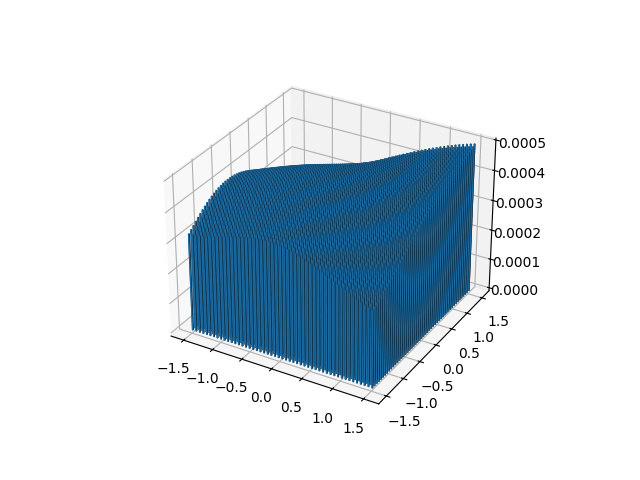

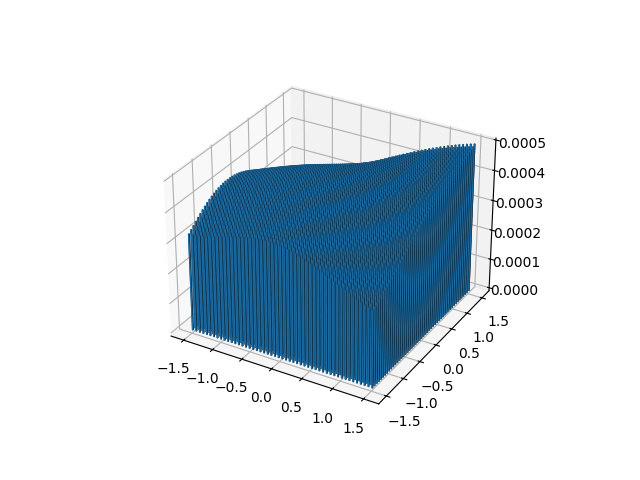

In [ ]:
%matplotlib widget
model.plot_heat_prior(w)

In [ ]:
beta_est=pd.DataFrame(beta_est, columns=['beta0', 'beta1'])

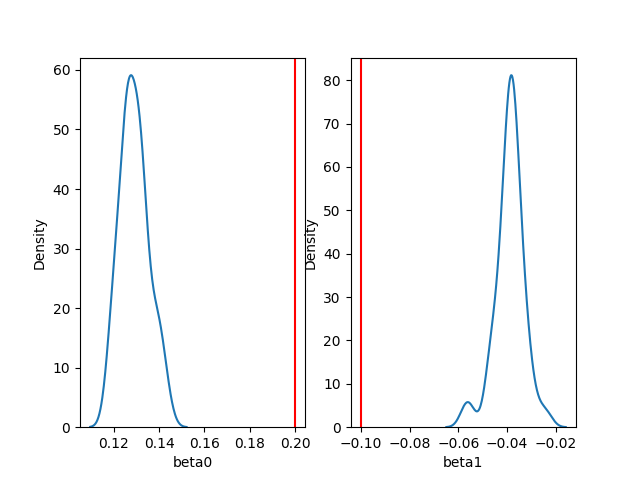

In [ ]:

#Draw beta_est distribution
fig, axs = plt.subplots(1,2)

for i in range(2):
    sns.kdeplot(data=beta_est, x=f'beta{i}', ax=axs[i])
    axs[i].axvline(model.beta[i], color='r')